In [1]:
import streamlit as st
import pandas as pd
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [69]:
path = 'test_image2.png'

img = cv2.imread(path)

In [166]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [164]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [15]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(img, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

In [37]:
imginv = 255-img

In [71]:
dst = cv2.fastNlMeansDenoisingColored(cv2.imread(path),None,10,10,7,21)

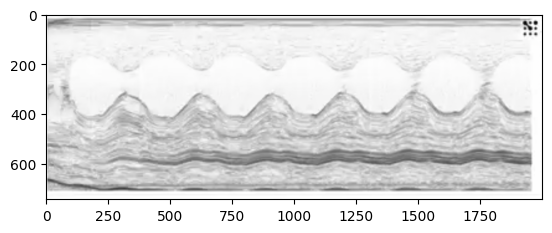

In [73]:
implot = plt.imshow(255-img, cmap='gray')


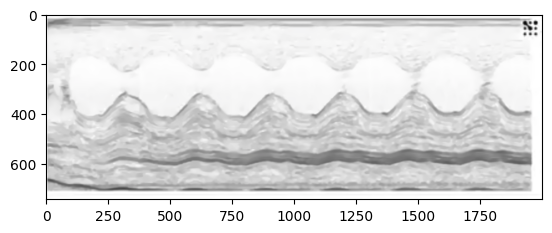

In [74]:
implot = plt.imshow(255-dst, cmap='gray')


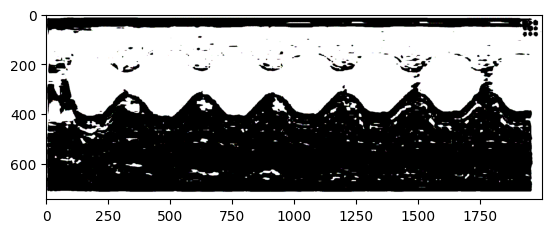

In [130]:
ret,thresh1 = cv2.threshold(img,25,255,cv2.THRESH_BINARY)
implot = plt.imshow(255-thresh1, cmap='gray')


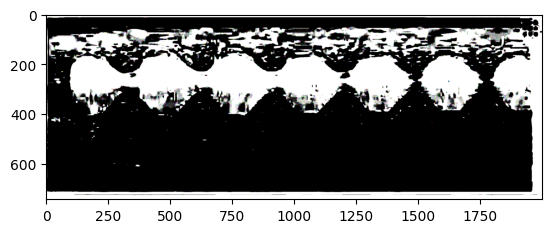

In [121]:
ret,thresh1 = cv2.threshold(img,10,255,cv2.THRESH_BINARY)
implot = plt.imshow(255-thresh1, cmap='gray')

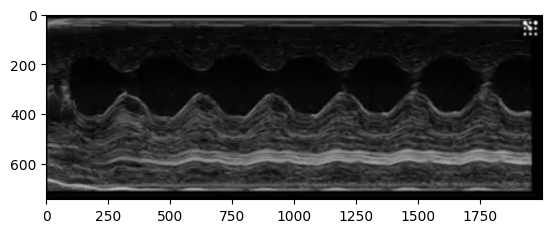

In [79]:
implot = plt.imshow(img, cmap='gray')

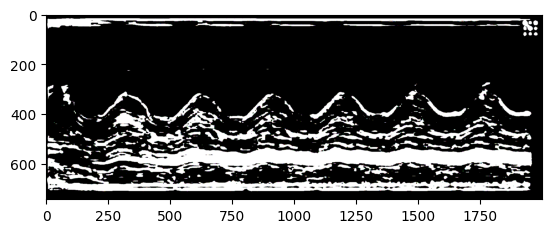

In [80]:
# LOWER LINE
ret,thresh1 = cv2.threshold(img,60,255,cv2.THRESH_BINARY)
implot = plt.imshow(thresh1, cmap='gray')

In [47]:
contours, hierarchy  = cv2.findContours(cv2.cvtColor(thresh1, cv2.COLOR_BGR2GRAY),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)            

In [44]:
cnts = imutils.grab_contours(contours)

In [50]:
contours = sorted(contours, key=cv2.contourArea)            
print(contours[-1])

[[[578 516]]

 [[578 517]]

 [[579 518]]

 ...

 [[581 519]]

 [[580 519]]

 [[578 517]]]


In [52]:
print(contours[len(contours)-1])

[[[578 516]]

 [[578 517]]

 [[579 518]]

 ...

 [[581 519]]

 [[580 519]]

 [[578 517]]]


In [45]:
mask2 = np.ones(img.shape[:2], dtype="uint8") * 255

In [61]:
for c in contours[:-1]:
    cv2.drawContours(mask2, c, -1, 0, -1)
        

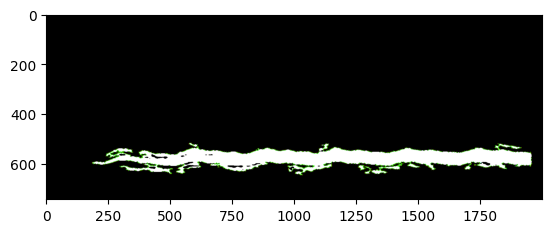

In [66]:
image = cv2.bitwise_and(thresh1, thresh1, mask=mask2)
implot = plt.imshow(image, cmap='gray')

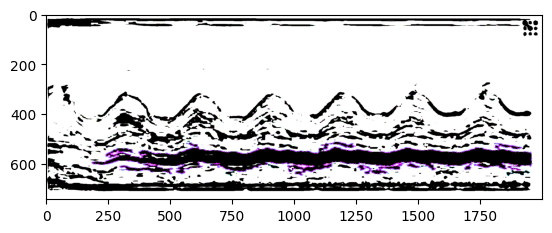

In [33]:
cv2.drawContours(thresh1, contours[-1], -1, 255, cv2.FILLED, 1)
implot = plt.imshow(255-thresh1, cmap='gray')

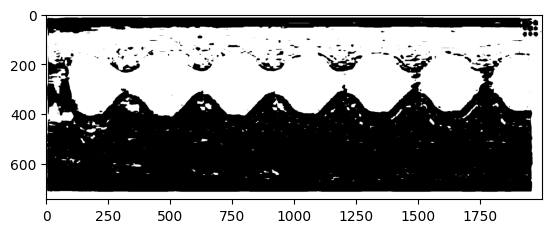

In [172]:
ret,thresh1 = cv2.threshold(img,20,200,cv2.THRESH_BINARY)
implot = plt.imshow(255-thresh1, cmap='gray')

In [52]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(100,40))
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (45,45))
mask = cv2.morphologyEx(255-thresh1, cv2.MORPH_CLOSE, kernel)
implot = plt.imshow(mask, cmap='gray')

In [36]:
def _bbAndMask(image, cnts):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.axis('off')
  ax2.axis('off')
  _bbox(image, cnts, ax1)
  _maskOutline(image, cnts, ax2)
  st.pyplot(fig)

In [37]:
def _heatmap(image, cnts):
  fig2 = plt.figure()
  plt.axis('off')
  hm = st.slider("slider for heatmap", min_value=0.0, max_value=1.0, step=0.1, value=0.5)
  img = _drawMask(image, cnts)
  plt.imshow(img, alpha=hm)
  plt.imshow(image, alpha=1-hm)
  plt.title("heatmap")
  st.pyplot(fig2)

In [38]:
def _bbox(image, cnts, ax):
  ax.imshow(image)
  for c in cnts:
    area = cv2.contourArea(c)
    if area < 10:
      continue
    [x, y, w, h] = cv2.boundingRect(c)
    ax.add_patch(Rectangle((x, y), w, h, color = "red", fill = False))

In [39]:
def _drawMask(image, cnts, fill=True):
  image = np.array(image)
  markers = np.zeros((image.shape[0], image.shape[1]))
  heatmap_img = cv2.applyColorMap(image, cv2.COLORMAP_JET)
  t = 2
  if fill:
    t = -1
  cv2.drawContours(markers, cnts, -1, (255, 0, 0), t)
  mask = markers>0
  image[mask,:] = heatmap_img[mask,:]
  return image

In [40]:
def _maskOutline(image, cnts, ax):
  img = _drawMask(image, cnts, False)
  ax.imshow(img)

In [163]:
type(mask)

numpy.ndarray

In [50]:
plt.imshow(255-mask, cmap='gray')

In [1]:
_ , contours, _ = cv2.findContours(mask,2,1)            
implot = plt.imshow(255-contours, cmap='gray')

NameError: name 'cv2' is not defined

2022-12-17 12:19:58.280 
  command:

    streamlit run /Users/arnau/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]


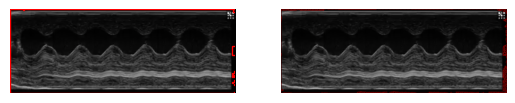

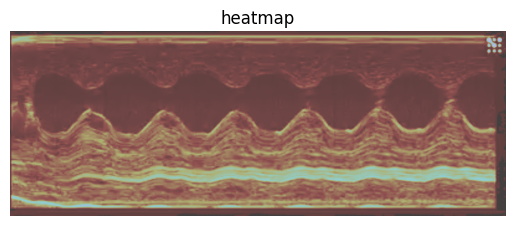

In [42]:
mask = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cnts,_= cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
_bbAndMask(img, cnts)
_heatmap(img, cnts)

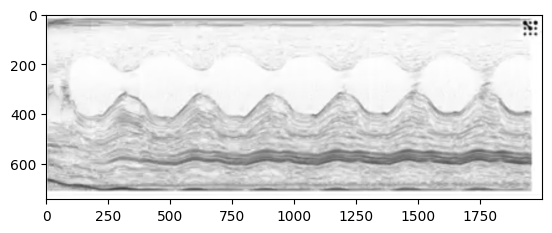

In [142]:
implot = plt.imshow(255-img, cmap='gray')

In [ ]:
se = strel('disk',10);
closeBW = imclose(originalBW,se);
figure, imshow(closeBW)

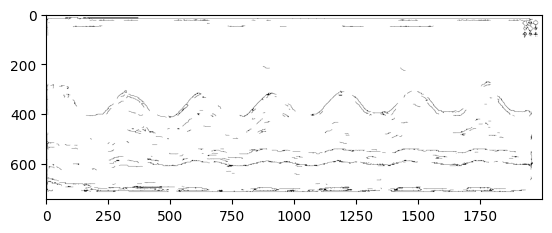

In [18]:
implot = plt.imshow(255-edged, cmap='gray')

In [7]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

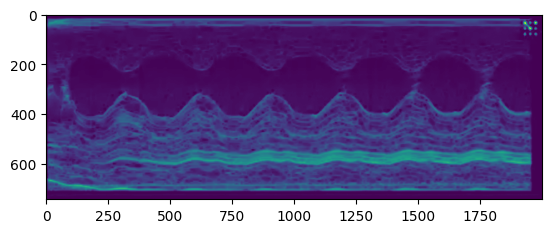

In [8]:
implot = plt.imshow(erosion)

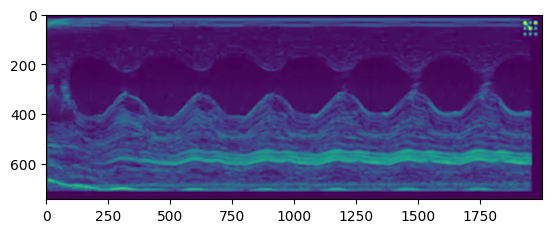

In [9]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
implot = plt.imshow(opening)

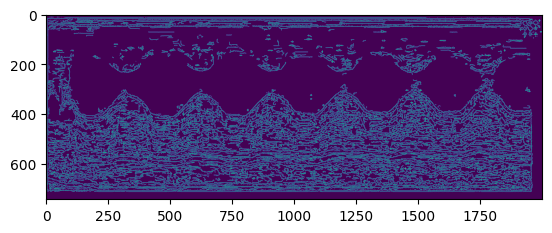

In [89]:
canny = cv2.Canny(img, 30, 10)
implot = plt.imshow(canny)